<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Alireza Shokrani

**Student ID**: 99106255

# Effect of Overfitting

In this exercise, we want to examine the effect of **overfitting**. As you learned in class, using too many features in training can result in a model with very low loss on the training set but high loss on the validation and test set. For this purpose, we have prepared a dataset in the `q2-train.npy`, `q2-valid.npy`, and `q2-test.npy` files for you. We know that `y` is a polynomial function of `x` in this dataset, meaning that 

$$
y = \sum_{i=0}^{k}a_ix^i
$$

However, we do not know the exact value of `k`.

## Importing Libraries

First, we import the necessary libraries for this assignment. Please note that you should only use these libraries and no other libraries are acceptable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this part of the assignment, you should read data from the `.npy` files. The data in `q2-train.npy` file is your training set and should be stored in the `X_train` and `Y_train` variables. Similarly, the data in `q2-valid.npy` file is your validation set, and the data in `q2-test.npy` file is your test set, which should be stored in `X_val`, `Y_val`, `X_test`, and `Y_test` respectively. You can use the `np.load` function to read the `.npy` files.

In [2]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
train = np.load('q2-train.npy')
val = np.load('q2-valid.npy')
test = np.load('q2-test.npy')
X_train = train[:,0]
Y_train = train[:,1]
X_val = val[:,0]
Y_val = val[:,1]
X_test = test[:,0]
Y_test = test[:,1]
### END CODE HERE ###

To find the best value of `k`, we want to change `k` from 1 to 12 and examine its effect on the validation set, and then choose the right value of `k`. For this purpose, we need to create a matrix with columns equal to $x^0$, $x^1$, $x^2$, ..., $x^k$ for every value of `k`. You can complete the following function to do this job. The function takes an $m \times 1$ vector `X` containing values of input `x` and returns an $m \times (k+1)$ matrix that has the properties mentioned above.

In [3]:
def create_matrix(X,k):
  '''
  X: an m by 1 array 
  '''
  new_X = None
  ### START CODE HERE ###
  new_X = np.zeros([len(X),k+1])
  for i in range(k+1):
      new_X[:,i] = X**i
  ### END CODE HERE ###
  return new_X

## Validate Model

Now, we want to train our model for every value of `k`. You can use any of the methods that we used in **Question 1** (gradient descent or direct calculation) for this purpose. The following function trains our model on the training set for a given value of `k`, and then returns the loss on the training set and validation set, as well as the weight vector `w`.

In [4]:
# If you need any other function for training write it here
# (like gradient descent or anything else)
def loss(X, Y, w):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  w: an (n+1) by 1 weight vector
  '''
  m, n = X.shape
  loss = None
  ### START CODE HERE ###
  loss = np.linalg.norm(Y - (X@w))**2 / m
  ### END CODE HERE ###
  return loss

def direct_method(X, Y):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  '''
  w = None
  ### START CODE HERE ###
  w = np.linalg.inv(X.T @ X) @ X.T @ Y
  ### END CODE HERE ###
  return w

In [5]:
def train(X_train, Y_train, X_val, Y_val, k):
  '''
  X_train: an m_train by 1 vector contains training points
  Y_train: an m_train by 1 vector contains training values
  X_val: an m_val by 1 vector contains validation points
  Y_val: an m_val by 1 vector contains validation values
  k: degree of polynomial
  '''
  w, loss_train, loss_val = None, None, None
  ### START CODE HERE ###
  num_iter = 100
  alpha = 0.1
  X_t = create_matrix(X_train,k)
  # w, hist = gradient_descent(X_t, Y_train, alpha, num_iter)
  # loss_train = hist[-1]
  w = direct_method(X_t, Y_train)
  loss_train = loss(X_t, Y_train, w)
  X_v = create_matrix(X_val,k)
  loss_val = loss(X_v, Y_val, w)
  ### END CODE HERE ###
  return w, loss_train, loss_val

In the cell below, you can change the value of `k` between 1 and 12 and plot the loss on the training and validation set as a function of `k` in the same plot.

**Question**: Discuss about the effect of $k$.

**Answer**: When k is small, the model does not have enough capacity and learning can’t be done properly. As we choose bigger values for k, the model earns the needed capacity and does better in both training and validation set. But when we set k to even bigger values, the training set loss will continue to decries slightly but the loss in the validation set will become terribly worse. In this case overfitting has happened. 

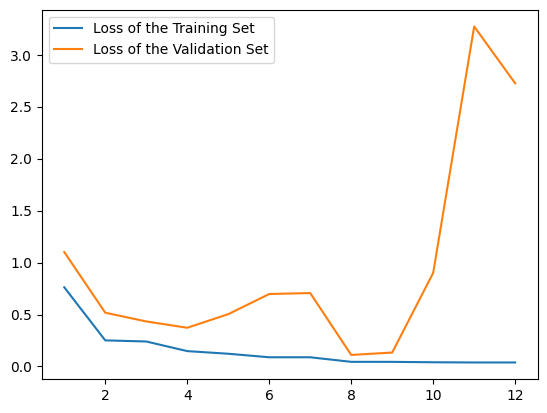

In [6]:
### START CODE HERE ###
loss_train = []
loss_val = []
Ks = range(1,13)
for k in Ks:
    out = train(X_train, Y_train, X_val, Y_val, k)
    loss_train.append(out[1])
    loss_val.append(out[2])

plt.plot(Ks, loss_train, label='Loss of the Training Set')
plt.plot(Ks, loss_val, label='Loss of the Validation Set')
plt.legend()
plt.show()
### END CODE HERE ###

## Evaluating Model

In the cell below find the loss of your best model on the test set.

**Question**: Why we need test set?

**Answer**: Training set is used to train the model and validation set is to choose the best model. We need another set that had no effect in any of the previous steps so we can test our model by a completely new data set which models the newer data that isn’t seen yet and is to be predicted. 

In [17]:
### START CODE HERE ###
k = 8
[w, loss_train, loss_val] = train(X_train, Y_train, X_val, Y_val, k)
X_ts = create_matrix(X_test,k)
loss_test = loss(X_ts, Y_test, w)
print(f'Loss of the Training Set = {loss_train}')
print(f'Loss of the Validation Set = {loss_val}')
print(f'Loss of the Test Set = {loss_test}')

Loss of the Training Set = 0.044821130927610274
Loss of the Validation Set = 0.11129319168931669
Loss of the Test Set = 0.11791424797275836
